# Tarefa 1

A proposta é implementar a solução aproximada para a a função de probabilidade acumulada normal padrão $\Phi(y)$, de acordo com o apresentado no Anexo F do livro de referência. <br>
O código abaixo apresenta a construção das aproximações de $\Phi(y)$ para os intervalos $0 \leq y \leq \infty$ e $-\infty \leq y \leq 0$

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Valores do parâmetro p_i
p_i = [0.231641900, 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429]

# Função w 
def w (y):
    return 1 / (1 + (p_i[0] * abs(y)))

# Função z
def z (w):
    return (w * (p_i[1] + w * (p_i[2] + w * (p_i[3] + w * (p_i[4] + w * p_i[5])))))

# Aproximação analítica para a função de probabilidade acumulada
# Para y negativo
def phi_neg (z , y):
    return (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))

# Para y positivo
def phi_pos (z , y):
    return 1 - (z / np.sqrt( 2 * np.pi)) * np.exp(- (y**2 / 2))





O código abaixo apresenta a verificação e plotagem da função $\Phi(y)$ para o intervalo $-10 \leq y \leq 10$

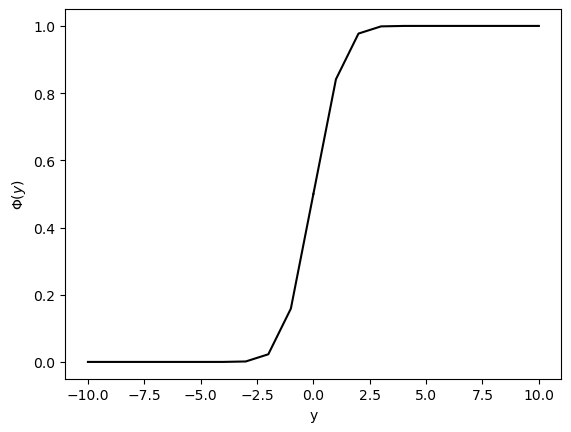

In [42]:
# Verificação das funções
# Vetores para guardar os resultados 
phi_neg_results = []
phi_pos_results = []
y_neg = []
y_pos = []
for y in range(-10 , 11, 1):
    if y < 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
    elif y == 0:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_neg_calc = phi_neg(z_calc, y)
        phi_neg_results.append(phi_neg_calc)
        y_neg.append(y)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)
    else:
        w_calc = w(y)
        z_calc = z(w_calc)
        phi_pos_calc = phi_pos(z_calc, y)
        phi_pos_results.append(phi_pos_calc)
        y_pos.append(y)

# Plotagem dos resultados
fig, ax = plt.subplots()
ax.plot(y_neg, phi_neg_results, color='black')
ax.plot(y_pos, phi_pos_results, color='black')
plt.xlabel('y')
plt.ylabel('$\\Phi(y)$')
plt.show()

Agora temos que o código abaixo apresenta a implementação da função CDF inversa $y=\Phi^{-1}(u)$

In [18]:
# Formulação da função inversa

# Valores do parâmetro p_i
p = [-0.3222324310880, -1.0000000000000, -0.3422422088547, -0.2042312102450e-1, -0.4536422101480e-4]

# Valores do parâmetro q_i
q = [0.9934846260600e-1, 0.5885815704950, 0.5311034623660, 0.10353775285000, 0.3856070063400e-2]

# Função inversa
# Para 0 < u <= 0.5
def y_1 (u):
    z = np.sqrt(np.log(1 / (u ** 2)))
    return -z - ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

# Para 0.5 <= u < 1
def y_2 (u):
    z = np.sqrt(np.log (1 / ((1 - u) ** 2)))
    return z + ((p[0] + z * (p[1] + z * (p[2] + z * (p[3] + z * (p[4]))))) / (q[0] + z * (q[1] + z * (q[2] + z * (q[3] + z * (q[4]))))))

Como verificação da implementação, calcula-se $\Beta_{num}=\Phi^{-1}(\Phi(-\Beta))$. O código abaixo apresenta o cálculo de $\Beta_{num}$ e plota o resultado para um intervalo $-8 \leq \Beta \leq 0$

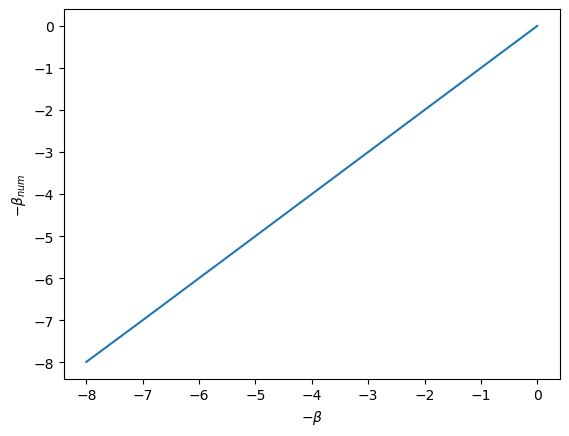

In [40]:
# Verificação da implementação

vetor_beta = [] 
vetor_beta_aprox = []

for i in np.arange (0, 9, 1):
    w_calc = w(i)
    z_calc = z(w_calc)
    vetor_beta.append(-1 * i)
    result = 1- phi_pos(z_calc, i)
    if result > 0:
        if result <= 0.5:
            inverse_result = y_1(result)
        else:
            inverse_result = y_2(result)
        vetor_beta_aprox.append(inverse_result)
   
plt.plot(vetor_beta, vetor_beta_aprox)
plt.xlabel('$-\\beta$')
plt.ylabel('$-\\beta_{num}$')
plt.show()



# Tarefa 2
Temos que no código abaixo possui a implementação das seguintes distribuições: <br>
- Distribuição normal;
- Distribuição log-normal;
- Gumbel para máximos e Gumbel para mínimos <br>

No código abaixo, temos uma estrutura de _data members_, na qual é possível calcular os momentos da distribuição (média, variância, desvio-padrão, coeficiente de variação, skewness e kurtosis) dado os parâmetros. <br>
Além disso, há uma estrutura de _member functions_ que calcula as funções $PDF$, $CDF$ e $CDF^{-1}$ e também calcula os parâmetros dados os momentos.


In [77]:
import xml
from scipy import stats as st 
import numpy as np
import matplotlib.pyplot as plt

# Data members
class variavel_aleatoria:
    # Função para identificar qual é a distribuição, o nome da variável e o simbolo da distribuição
    def __init__(self, distribuicao: str, nome: str = "", simbolo: str =""):
        # Identificação
        self.nome = nome
        self.simbolo = simbolo
        self.distribuicao = distribuicao  

        # Lista de argumentos
        self.parametros = []
        self.objeto = None

        # Momentos da variável
        self.media = np.nan 
        self.variancia = np.nan
        self.desvio = np.nan
        self.cv = np.nan # Coeficiente de variação
        self.skewness = np.nan
        self.kurtosis = np.nan

        # Distribuições implementadas
        self.distribuicoes = {
            'normal' : st.norm,
            'lognormal' : st.lognorm,
            'gumbel_max': st.gumbel_r,
            'gumbel_min': st.gumbel_l,
        }

        # Aqui as distribuições contemplaDas são atribuidas ao componente objeto
        self.objeto = self.distribuicoes[self.distribuicao]

        # Aqui os parâmetros de cada distribuição são definidos e os momentos calculados a partir dos parâmetros
    def conjunto_parametros (self, *params):
        self.parametros = params
        self.calculo_momentos()
    
        # Aqui os momentos são calculados a partir dos parametros
    def calculo_momentos(self):
        m, v, sk, k = self.objeto.stats(*self.parametros, moments = 'mvsk')

        # Armazenamento dos momentos nas variáveis
        self.media = float(m)
        self.variancia = float(v)
        self.desvio = np.sqrt(self.variancia)
        self.skewness = float(sk)
        self.kurtosis = float(k)

        if self.media != 0:
            self.cv = self.desvio / self.media
        else:
            self.cv = np.nan
    
    # Aqui calcula-se os parametros de cada distribuição dado os momentos (média e desvio padrão)
    def calculo_parametros (self, media_dada: float, desvio_dado: float):
        mu = media_dada
        sigma = desvio_dado

        if self.distribuicao =='normal':
            self.conjunto_parametros(mu, sigma)
        
        elif self.distribuicao == 'lognormal':
            zeta = np.sqrt(np.log(1.0 + (sigma / mu) ** 2))
            lam = np.log(mu) - (0.5 * (zeta ** 2))
            scale = np.exp(lam)
            self.conjunto_parametros(zeta, loc=0, scale=scale)

        elif self.distribuicao in ['gumbel_max', 'gumbel_min']:
            mu = media_dada
            sigma = desvio_dado
            gamma = 0.5772156649 #Constante de Euler-Mascheroni
            beta =  np.pi / (sigma * np.sqrt(6))

            if self.distribuicao == 'gumbel_max':
                mu_calc = mu - (gamma / beta)
            else:
                mu_calc = mu + (gamma / beta)
            self.conjunto_parametros(mu_calc, beta)
    
    # Agora vamos construir as funções fundamentais (PDF, CDF, Inversa)
    def PDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.pdf(x, *self.parametros)
        return np.nan
    
    def CDF (self, x: float) -> float:
        if self.objeto:
            return self.objeto.cdf(x, *self.parametros)
        return np.nan
    
    def InversaCDF (self, p: float) -> float:
        if self.objeto:
            return self.objeto.ppf(p, *self.parametros)
        return np.nan

Agora, para cada distribuição implementada, vamos testar a estrutura anterior calculando os momentos das variáveis dado os parâmetros e plotando as funções $PDF$ e $x_{aprox} = CDF^{-1}(x,CDF(X,x))$. <br>

# Teste da estrutura para a distribuição normal
Neste teste vamos supor uma variável X ~ N(50,200) e apresentar o cálculo dos momentos à partir dos parâmetros.


In [82]:
#Teste da estrutura
X_normal = variavel_aleatoria(distribuicao = 'normal', nome='VA normal', simbolo='X_N')
media_dada = 200
sigma_dado = 50
X_normal.conjunto_parametros(media_dada, sigma_dado)

# Teste do conjunto de parametros e momentos para uma distribuição normal
print('Verificação da distribuição normal: Calculo dos momentos dados os parâmetros')
print(f"X: {X_normal.nome}")
print(f"Parâmetros: {X_normal.parametros}")
print(f"Média calculada: {X_normal.media}")
print(f"Desvio padrão: {X_normal.desvio}")
print(f"Coeficiente de variação: {X_normal.cv}")
print(f"Skewness: {X_normal.skewness}")
print(f"Kurtosis: {X_normal.kurtosis}")

Verificação da distribuição normal: Calculo dos momentos dados os parâmetros
X: VA normal
Parâmetros: (200, 50)
Média calculada: 200.0
Desvio padrão: 50.0
Coeficiente de variação: 0.25
Skewness: 0.0
Kurtosis: 0.0


Uma vez calculados os parâmetros, agora vamos vamos plotar os resultados $x_{aprox} = CDF^{-1}(x,CDF(X,x))$ para um intervalo $\mu - 5\sigma \leq x \leq \mu + 5\sigma$ e também vamos plotar a função $PDF$.

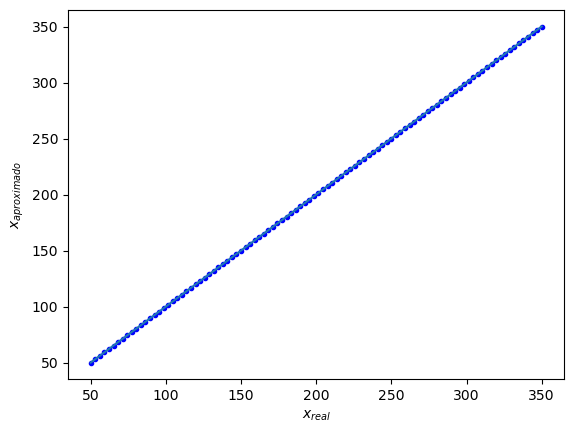

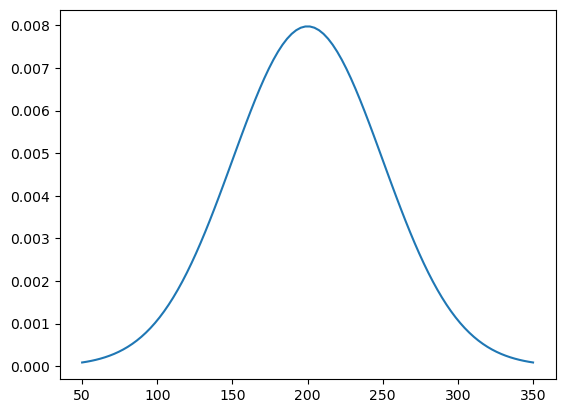

[np.float64(49.99999999999997),
 np.float64(53.03030303030303),
 np.float64(56.060606060606034),
 np.float64(59.09090909090909),
 np.float64(62.121212121212125),
 np.float64(65.15151515151516),
 np.float64(68.18181818181822),
 np.float64(71.21212121212119),
 np.float64(74.24242424242422),
 np.float64(77.27272727272727),
 np.float64(80.30303030303033),
 np.float64(83.33333333333337),
 np.float64(86.36363636363636),
 np.float64(89.39393939393938),
 np.float64(92.42424242424244),
 np.float64(95.45454545454544),
 np.float64(98.48484848484848),
 np.float64(101.51515151515147),
 np.float64(104.54545454545452),
 np.float64(107.57575757575756),
 np.float64(110.6060606060606),
 np.float64(113.63636363636361),
 np.float64(116.66666666666664),
 np.float64(119.69696969696967),
 np.float64(122.72727272727273),
 np.float64(125.75757575757575),
 np.float64(128.78787878787878),
 np.float64(131.8181818181818),
 np.float64(134.84848484848484),
 np.float64(137.87878787878785),
 np.float64(140.90909090909

In [83]:
# Teste da inversa e CDF, utilizando 3 desvios padrão a partir da média no caso de distribuição normal
from matplotlib.pyplot import plot


x_min = media_dada - (3 * sigma_dado)
x_max = media_dada + (3 * sigma_dado)
x_real = np.linspace(x_min, x_max, 100)

x_aproximado = []
pdf = []
for x in x_real:
    p = X_normal.CDF(x)
    pdf_calc = X_normal.PDF(x)
    x_calc = X_normal.InversaCDF(p)
    x_aproximado.append(x_calc)
    pdf.append(pdf_calc)

# Gráfico do valor aproximado x valor real
plt.plot(x_real, x_aproximado, 'b.', alpha=1)
plt.plot(x_real, x_real)
plt.xlabel('$x_{real}$')
plt.ylabel('$x_{aproximado}$')
plt.show()
plt.plot(x_real, pdf)
plt.show()
# plt.plot(r_teste[0], r_teste[1])
np.shape(x_aproximado)

x_aproximado